In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pywt

%matplotlib inline

In [2]:
SMALL_SIZE = 17
MEDIUM_SIZE = 18
BIGGER_SIZE = 19

plt.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "pgf.texsystem": 'pdflatex',  # default is xetex
    }
)

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize

In [3]:
nscenarios = 3

In [4]:
undecimated = ""
radiotelescope = "meerkat"

In [5]:
means_file = "wavelet_red_jvla_means_meerkat.npy"

In [6]:
stds_file = "wavelet_red_jvla_stds_meerkat.npy"

In [7]:
scenarios_means = np.load(means_file)
scenarios_stds = np.load(stds_file)

In [8]:
scenarios_means.shape

(3, 4, 5)

In [9]:
use_wavelet = ["haar", "coif", "db", "dmey", "sym"]
# use_wavelet.remove("haar")
nwavelets = len(use_wavelet)
#idx_coif = [use_wavelet.index("coif") - 0.5, use_wavelet.index("db") - 0.5, use_wavelet.index("dmey") - 0.5,  use_wavelet.index("rbio") - 0.5, use_wavelet.index("sym") - 0.5]

In [10]:
# Getting minimum AICs
idx_sc1 = np.argmin(scenarios_means[0, 2])
idx_sc2 = np.argmin(scenarios_means[1, 2])
idx_sc3 = np.argmin(scenarios_means[2, 2])

In [11]:
scenarios_means[0, 2, 4]
scenarios_means[1, 2, 4]
scenarios_means[2, 2, 4]

-6385.3423

In [12]:
print(
    "Scenario 1: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 2, idx_sc1], scenarios_stds[0, 2, idx_sc1]
    )
)
print(
    "Scenario 2: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 2, idx_sc2], scenarios_stds[1, 2, idx_sc2]
    )
)
print(
    "Scenario 3: Best AIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 2, idx_sc3], scenarios_stds[2, 2, idx_sc3]
    )
)

Scenario 1: Best AIC Wavelet family dmey : -12002.17 \pm 62.79
Scenario 2: Best AIC Wavelet family haar : -11662.77 \pm 88.39
Scenario 3: Best AIC Wavelet family haar : -11450.86 \pm 121.98


In [13]:
print(
    "Scenario 1: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 3, idx_sc1], scenarios_stds[0, 3, idx_sc1]
    )
)
print(
    "Scenario 2: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 3, idx_sc2], scenarios_stds[1, 3, idx_sc2]
    )
)
print(
    "Scenario 3: Best BIC Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 3, idx_sc3], scenarios_stds[2, 3, idx_sc3]
    )
)

Scenario 1: Best BIC Wavelet family dmey : -11793.03 \pm 97.80
Scenario 2: Best BIC Wavelet family haar : -11297.67 \pm 136.81
Scenario 3: Best BIC Wavelet family haar : -10950.97 \pm 168.62


In [14]:
print(
    "Scenario 1: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc1], scenarios_means[0, 0, idx_sc1], scenarios_stds[0, 0, idx_sc1]
    )
)
print(
    "Scenario 2: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc2], scenarios_means[1, 0, idx_sc2], scenarios_stds[1, 0, idx_sc2]
    )
)
print(
    "Scenario 3: Best PSNR Wavelet family {0} : {1:.2f} \pm {2:.2f}".format(
        use_wavelet[idx_sc3], scenarios_means[2, 0, idx_sc3], scenarios_stds[2, 0, idx_sc3]
    )
)

Scenario 1: Best PSNR Wavelet family dmey : 125.47 \pm 5.87
Scenario 2: Best PSNR Wavelet family haar : 196.49 \pm 9.19
Scenario 3: Best PSNR Wavelet family haar : 184.84 \pm 8.53


In [15]:
print(
    "Scenario 1: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(
        use_wavelet[idx_sc1], scenarios_means[0, 1, idx_sc1] * 10**5,
        scenarios_stds[0, 1, idx_sc1] * 10**5
    )
)
print(
    "Scenario 2: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(
        use_wavelet[idx_sc2], scenarios_means[1, 1, idx_sc2] * 10**5,
        scenarios_stds[1, 1, idx_sc2] * 10**5
    )
)
print(
    "Scenario 3: Best RMSE Wavelet family {0} : ({1:.2f} \pm {2:.2f})*1e-5".format(
        use_wavelet[idx_sc3], scenarios_means[2, 1, idx_sc3] * 10**5,
        scenarios_stds[2, 1, idx_sc3] * 10**5
    )
)

Scenario 1: Best RMSE Wavelet family dmey : (1336.95 \pm 26.52)*1e-5
Scenario 2: Best RMSE Wavelet family haar : (1477.76 \pm 40.55)*1e-5
Scenario 3: Best RMSE Wavelet family haar : (1565.58 \pm 61.21)*1e-5


In [16]:
#coif2_idx = [x for x in range(len(use_wavelet)) if use_wavelet[x] == "coif2"][0]
#sym6_idx = [x for x in range(len(use_wavelet)) if use_wavelet[x] == "sym6"][0]

In [17]:
#print("AIC Scenario 2 coif2: "+str(scenarios_means[1, 2, coif2_idx]))

In [18]:
#print("AIC Scenario 2 sym6: "+str(scenarios_means[1, 2, sym6_idx]))

In [19]:
delta_basis_means = np.load("deltaf_meerkat_scenarios_means_50.npy")
delta_basis_stds = np.load("deltaf_meerkat_scenarios_stds_50.npy")

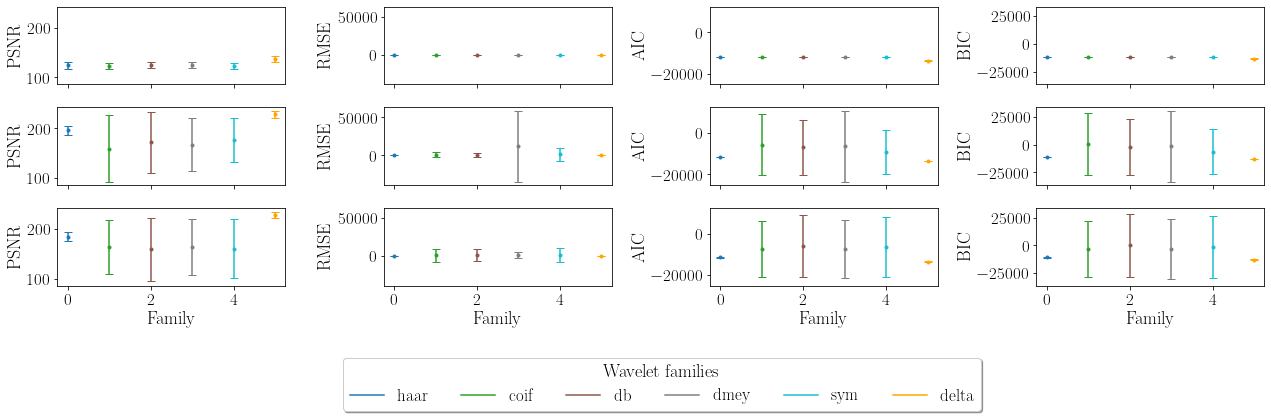

In [20]:
_id = np.arange(0, nwavelets)
names = ["PSNR", "RMSE", "AIC", "BIC"]
fig, ax = plt.subplots(
    nrows=scenarios_means.shape[0], ncols=len(names), sharey='col', sharex='all', figsize=(18, 5)
)
#cmap = plt.get_cmap('tab20')
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in np.linspace(0, 1, nwavelets)]

for i in range(scenarios_means.shape[0]):
    for j in range(len(names)):
        for k in range(scenarios_means.shape[2]):
            ax[i, j].plot(_id[k], scenarios_means[i, j, k], label=use_wavelet[k], color=colors[k])
            ax[i, j].errorbar(
                _id[k],
                scenarios_means[i, j, k],
                yerr=scenarios_stds[i, j, k],
                fmt='.',
                capsize=4,
                color=colors[k]
            )
            #if names[f] == "PSNR" and sc==3:
            #ax[sc-1,f].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
            ax[i, j].set_ylabel(names[j])
        if i == 2:
            ax[i, j].set_xlabel("Family")
        ax[i, j].plot(_id[-1] + 1, delta_basis_means[i, j], label="delta", color="orange")
        ax[i, j].errorbar(
            _id[-1] + 1,
            delta_basis_means[i, j],
            yerr=delta_basis_stds[i, j],
            fmt='.',
            capsize=4,
            color="orange"
        )

#for k in range(len(idx_coif)):
#    for i in range(scenarios_means.shape[0]):
#        for j in range(len(names)):
#            ax[i,j].axvline(x = idx_coif[k], color = 'k', linestyle="--", alpha=0.8)

#for i in range(scenarios_means.shape[0]):
#ax[i,1].set_ylim([0,0.0015])
#ax[i,2].set_ylim([-25000,-20000])
#ax[i,3].set_ylim([-25000,-20000])

#ax[i,2].set_ylim([-25000,-15000]) #undecimated
#ax[i,3].set_ylim([-25000,17500]) #undecimated

ofile_name = "families_" + undecimated + "wavelets_" + radiotelescope + ".pdf"
#fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#ax[len(scenarios)-1, 1].legend(loc='upper left', bbox_to_anchor=[1.0, -0.5], ncol=19, fancybox=True, shadow=True, title="Wavelets")
h, l = ax[0, 0].get_legend_handles_labels()
legend = fig.legend(
    h,
    l,
    loc='lower center',
    ncol=18,
    fancybox=True,
    bbox_to_anchor=[0.52, -0.2],
    shadow=True,
    title="Wavelet families"
)
# fig.suptitle("Delta dirac basis + Undecimated Wavelet")
fig.tight_layout()
if os.path.isfile(ofile_name):
    os.remove(ofile_name)  # Opt.: os.system("rm "+strFile)
fig.savefig(ofile_name, dpi=100, bbox_inches='tight')  #